Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


In [44]:
import thinkstats2
import thinkplot
import numpy as np

Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [27]:
live = preg[preg.outcome == 1]
print live
wgt_cdf = thinkstats2.Cdf(live.totalwgt_lb, label='')

       caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0           1         1        NaN        NaN       NaN       NaN         6   
1           1         2        NaN        NaN       NaN       NaN         6   
2           2         1        NaN        NaN       NaN       NaN         5   
3           2         2        NaN        NaN       NaN       NaN         6   
4           2         3        NaN        NaN       NaN       NaN         6   
5           6         1        NaN        NaN       NaN       NaN         6   
6           6         2        NaN        NaN       NaN       NaN         6   
7           6         3        NaN        NaN       NaN       NaN         6   
8           7         1        NaN        NaN       NaN       NaN         5   
9           7         2        NaN        NaN       NaN       NaN         5   
10         12         1        NaN        NaN       NaN       NaN         5   
11         14         1        NaN        NaN       

Display the CDF.

/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


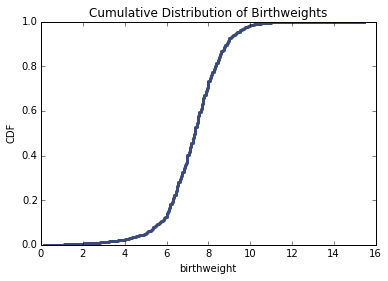

In [6]:
thinkplot.Cdf(wgt_cdf)
thinkplot.Show(xlabel='birthweight',
               ylabel = 'CDF',
               title = 'Cumulative Distribution of Birthweights')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [19]:
wgt_cdf.PercentileRank(8.2)
# wgt_cdf.PercentileRank(live.totalwgt_lb.mean())

77.362248285018808

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [21]:
others = live[live.pregordr > 1]
others_wgt_cdf = thinkstats2.Cdf(others.totalwgt_lb)
others_wgt_cdf.PercentileRank(8.2)

76.150481189851277

Compute the percentile rank of your birthweight

81.422881168400082

Compute the median birth weight by looking up the value associated with p=0.5.

In [22]:
wgt_cdf.Value(0.5)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [23]:
iqr = (wgt_cdf.Percentile(25), wgt_cdf.Percentile(75))
iqr

(6.5, 8.125)

Make a random selection from <tt>cdf</tt>.

In [25]:
wgt_cdf.Random()

8.125

Draw a random sample from <tt>cdf</tt>.

In [28]:
wgt_cdf.Sample(10)

array([ 6.3125,  6.625 ,  8.    ,  5.375 ,  7.5625,  7.5   ,  6.4375,
        8.0625,  6.1875,  4.8125])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

{'xscale': 'linear', 'yscale': 'linear'}

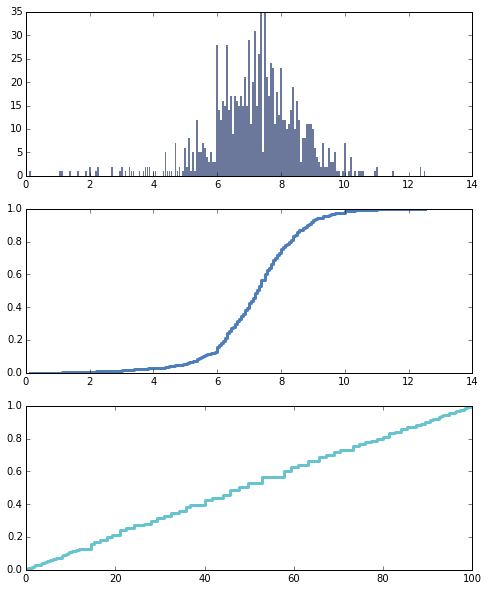

In [43]:
values = wgt_cdf.Sample(1000)
values_hist = thinkstats2.Hist(values, 'values')

ranks = [wgt_cdf.PercentileRank(v) for v in values]
ranks_hist = thinkstats2.Hist(ranks, 'ranks')

thinkplot.PrePlot(3, rows=3)
thinkplot.SubPlot(1)
thinkplot.Hist(values_hist, label='values Hist')

thinkplot.SubPlot(2)
values_cdf = thinkstats2.Cdf(values, label='values CDF')
thinkplot.Cdf(values_cdf)


thinkplot.SubPlot(3)
ranks_cdf = thinkstats2.Cdf(ranks, label='ranks CDF')
thinkplot.Cdf(ranks_cdf)

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

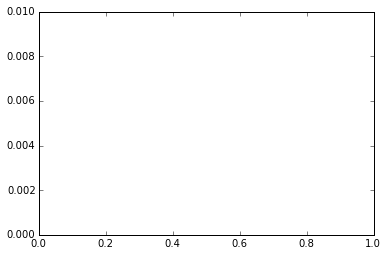

In [54]:
rand_vals = [np.random.random() for i in range(100)]

rv_pmf = thinkstats2.Pmf(rand_vals, label="random values")
thinkplot.Hist(rv_pmf)

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

{'xscale': 'linear', 'yscale': 'linear'}

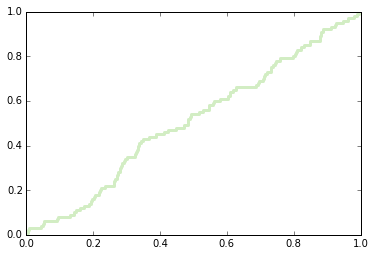

In [55]:
rv_cdf = thinkstats2.Cdf(rand_vals, label="random values")
thinkplot.Cdf(rv_cdf)

0.5